In [1]:
import numpy as np
import pandas as pd

In [2]:
# importing the dataset

df = pd.read_csv(r"C:\Users\HP\Downloads\Cricket.csv", encoding='latin1')

In [3]:
df.head() 

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [4]:
df.shape

(79, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 8.1+ KB


In [6]:
df.describe()

,Mat,Inns,NO,Runs,Ave,BF,SR,100,50,0
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,245.075949,230.544304,30.037975,7618.139241,38.523291,9684.455696,79.295316,11.556962,46.443038,13.253165
std,74.211716,70.321022,14.421710,2551.873313,5.919093,3193.835825,9.925307,8.092014,16.351701,5.925755
min,128.000000,127.000000,4.000000,5080.000000,23.570000,5504.000000,60.570000,0.000000,23.000000,3.000000
25%,188.000000,177.000000,17.500000,5759.000000,34.600000,7393.500000,73.725000,6.000000,34.500000,9.000000
50%,232.000000,217.000000,29.000000,6798.000000,37.870000,9134.000000,77.730000,10.000000,42.000000,13.000000
75%,281.500000,261.500000,40.000000,8739.500000,41.845000,10976.000000,85.180000,15.500000,54.000000,16.000000
max,463.000000,452.000000,70.000000,18426.000000,53.940000,21367.000000,117.000000,49.000000,96.000000,34.000000


In [7]:
# null values

df.isnull().sum()

Player    0
Span      0
Mat       0
Inns      0
NO        0
Runs      0
HS        0
Ave       0
BF        0
SR        0
100       0
50        0
0         0
dtype: int64

In [8]:
# to convert the span into years of experience
# we first split the span into start and end and store in new column

df[['Strt','End']] = df.Span.str.split("-",expand=True) 

In [9]:
# convert them as int and
# find years of exp as end year - start year
# later drop the unneceassry columns such as start, end and span
# we are only left with the experience column now

df[['Strt','End']]=df[['Strt','End']].astype(int)
df['Exp']=df['End']-df['Strt']
df=df.drop(['Strt','End','Span'], axis = 1) 
df.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,SR Tendulkar (INDIA),463,452,41,18426,200*,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

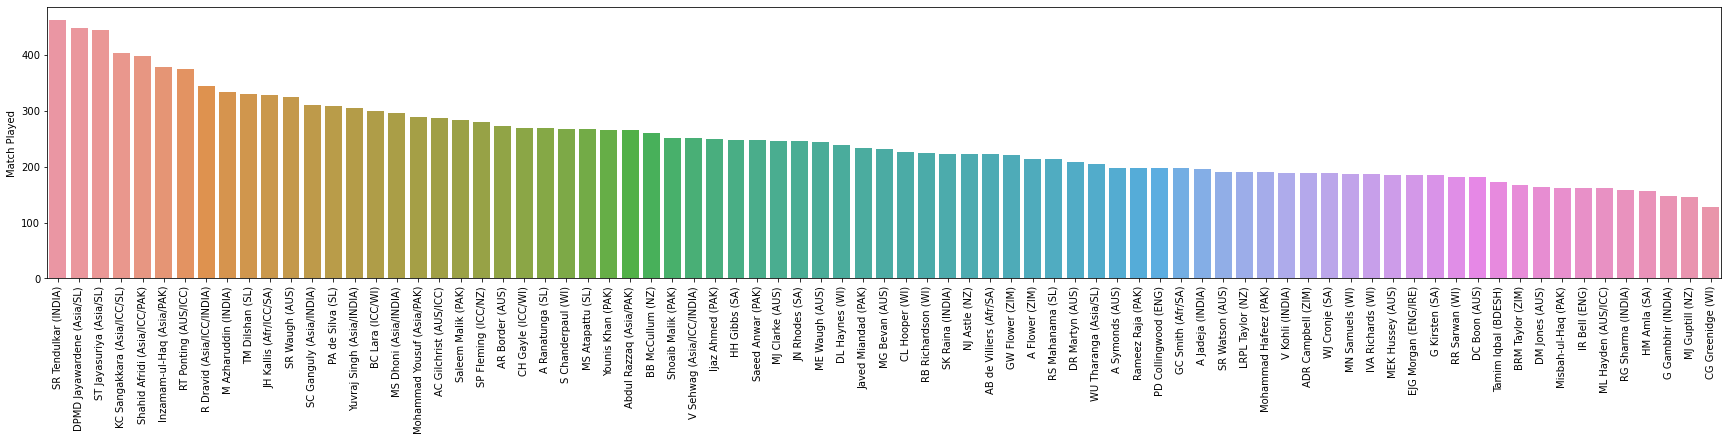

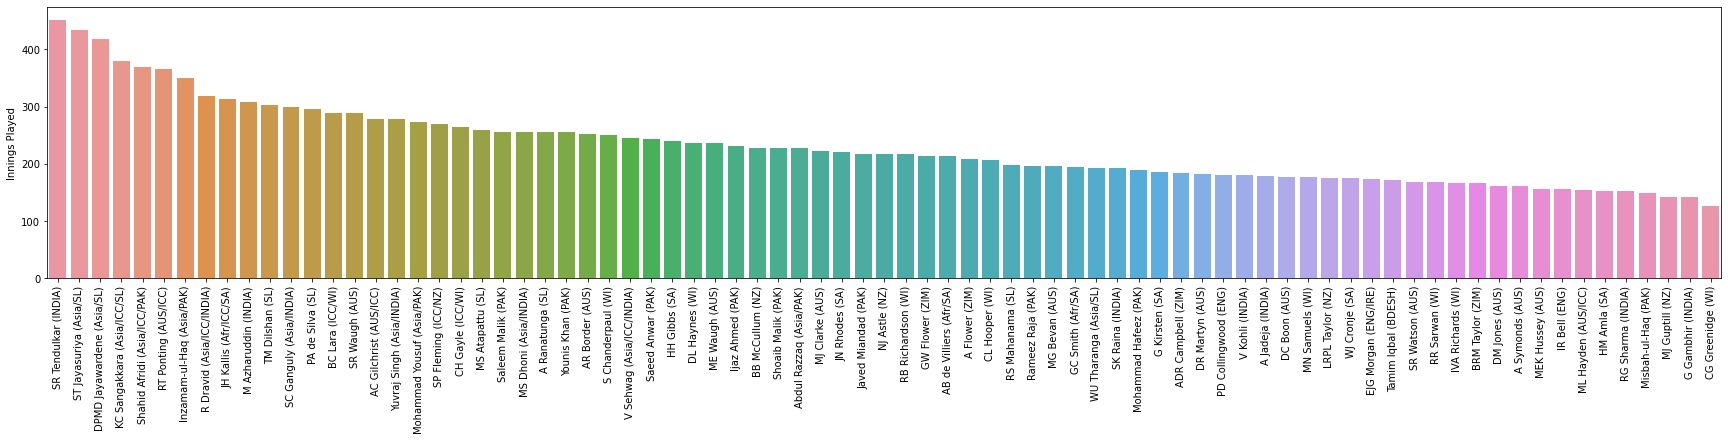

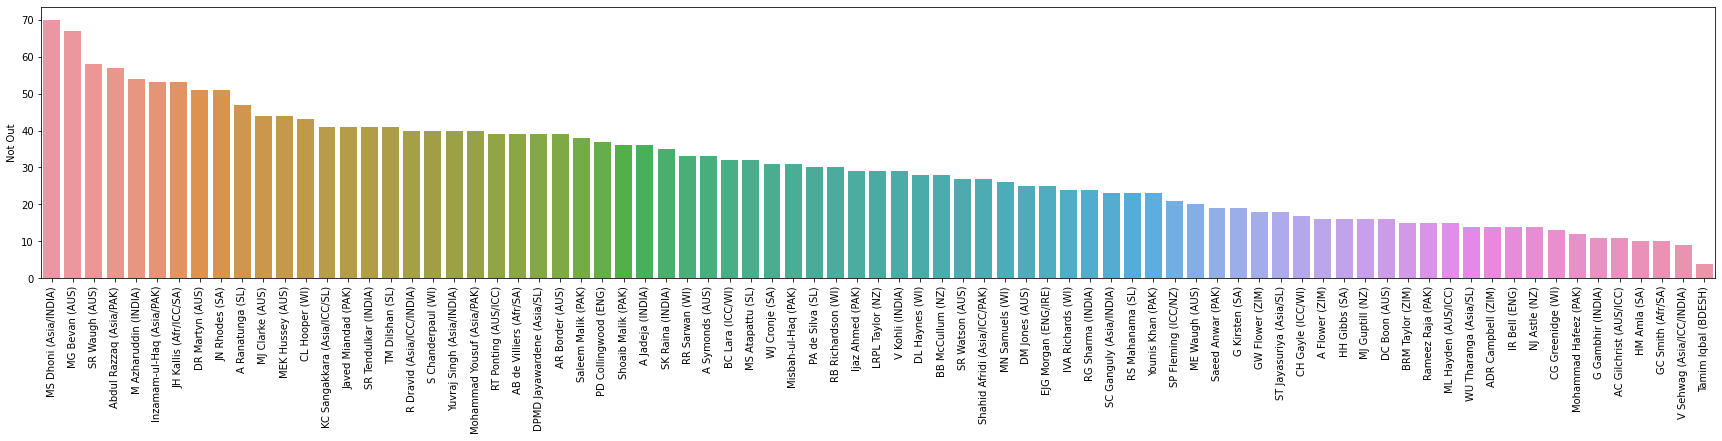

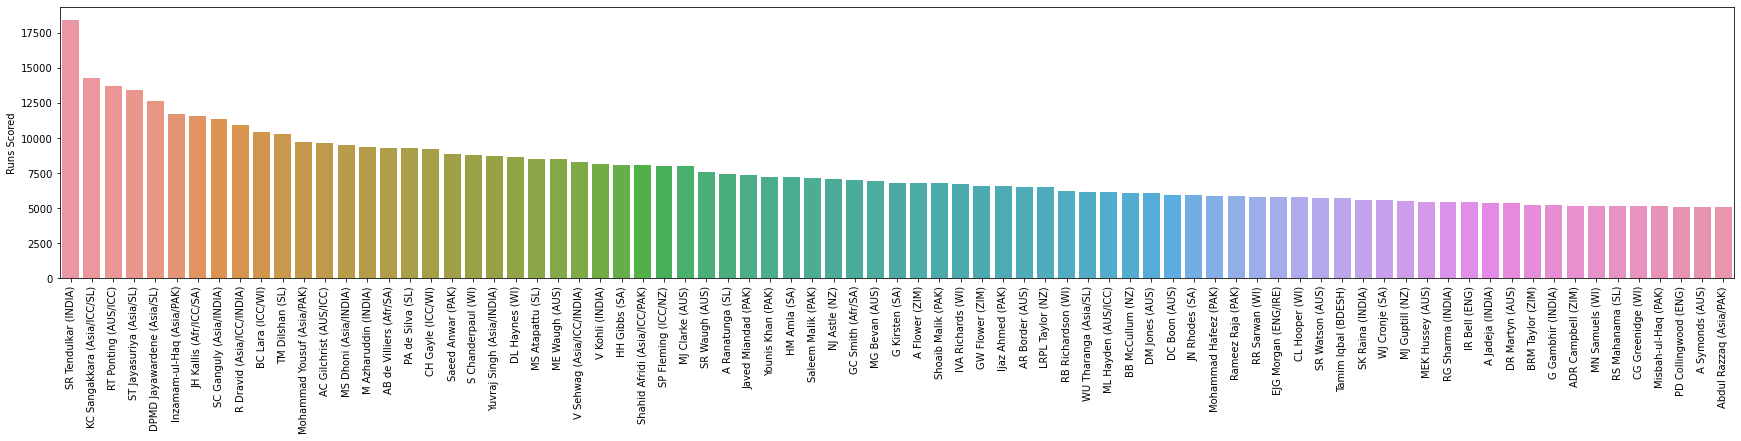

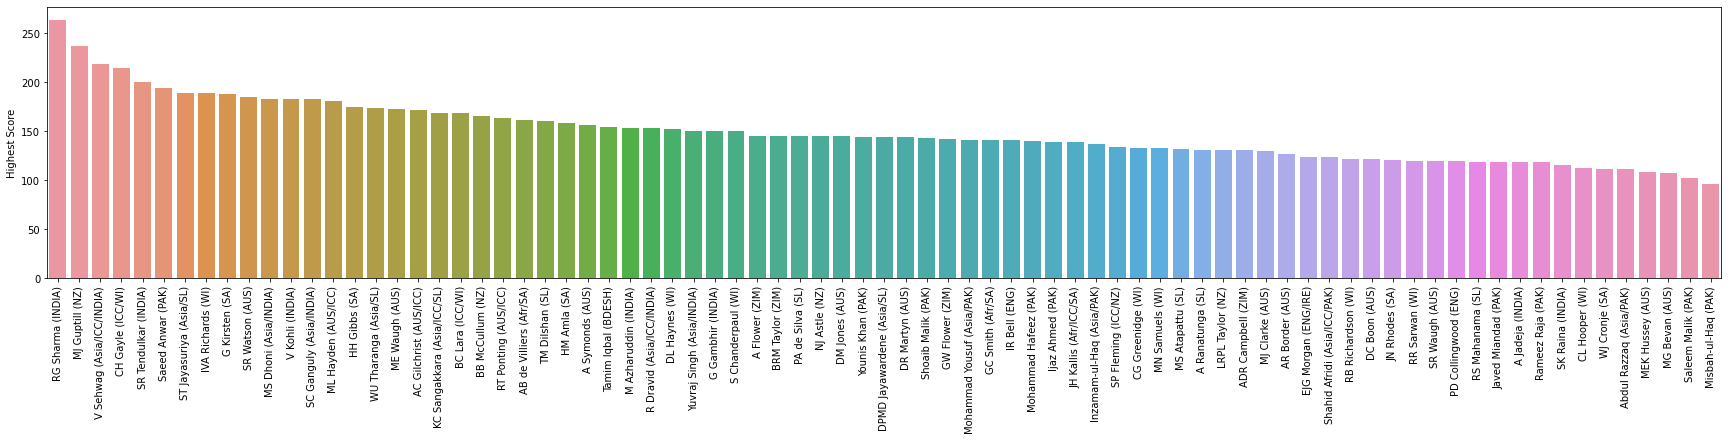

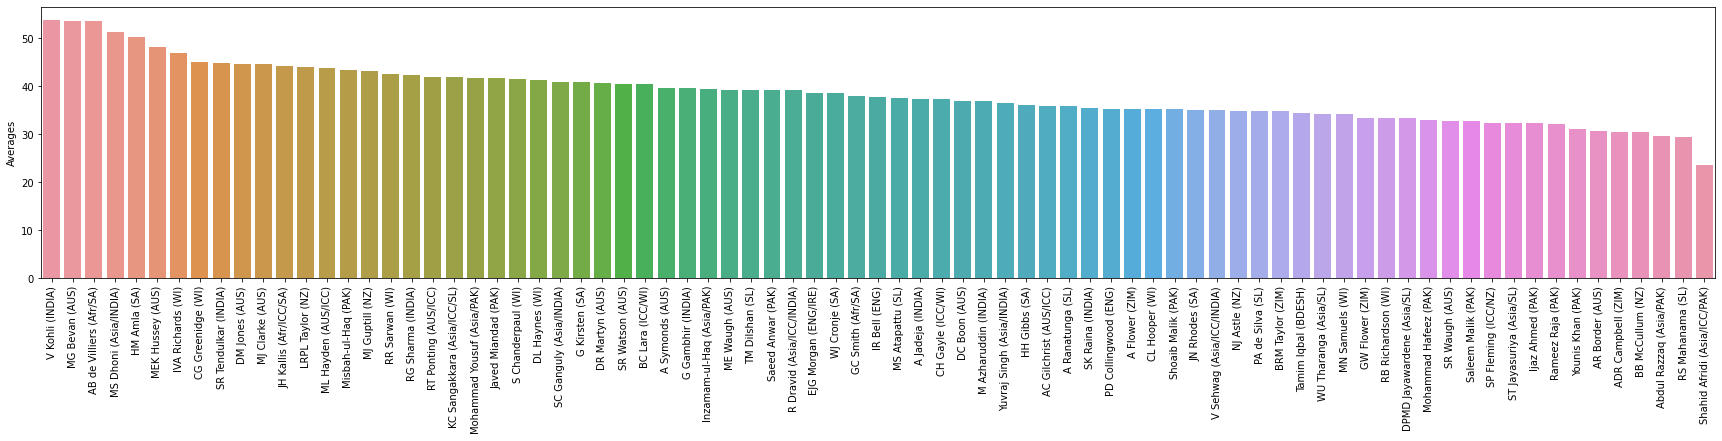

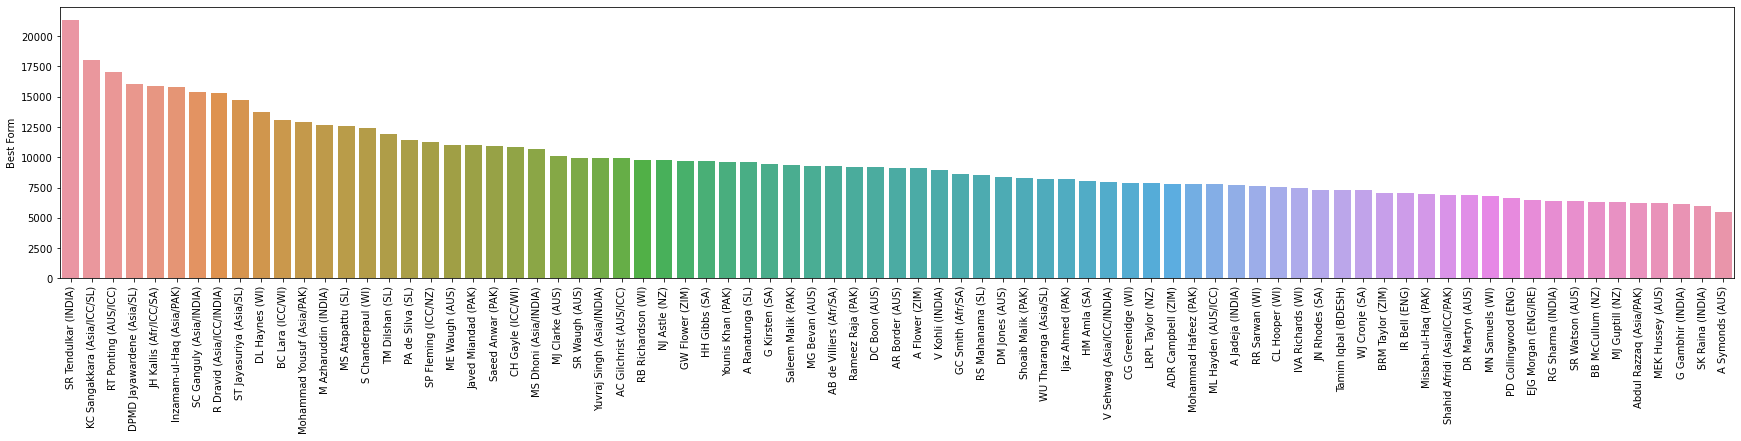

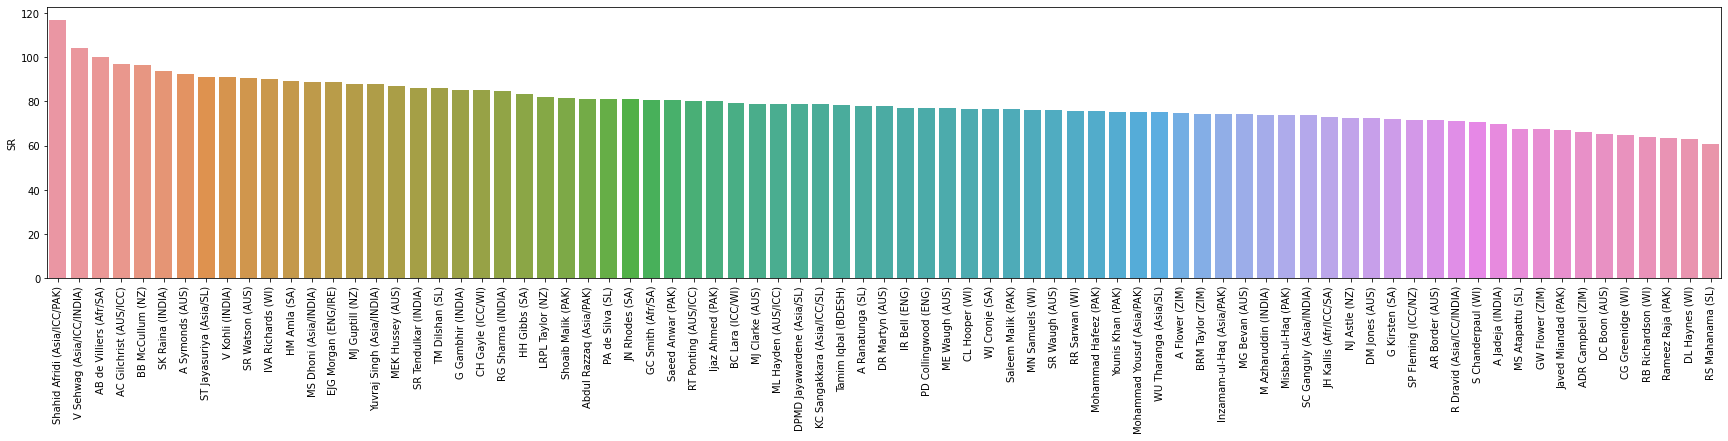

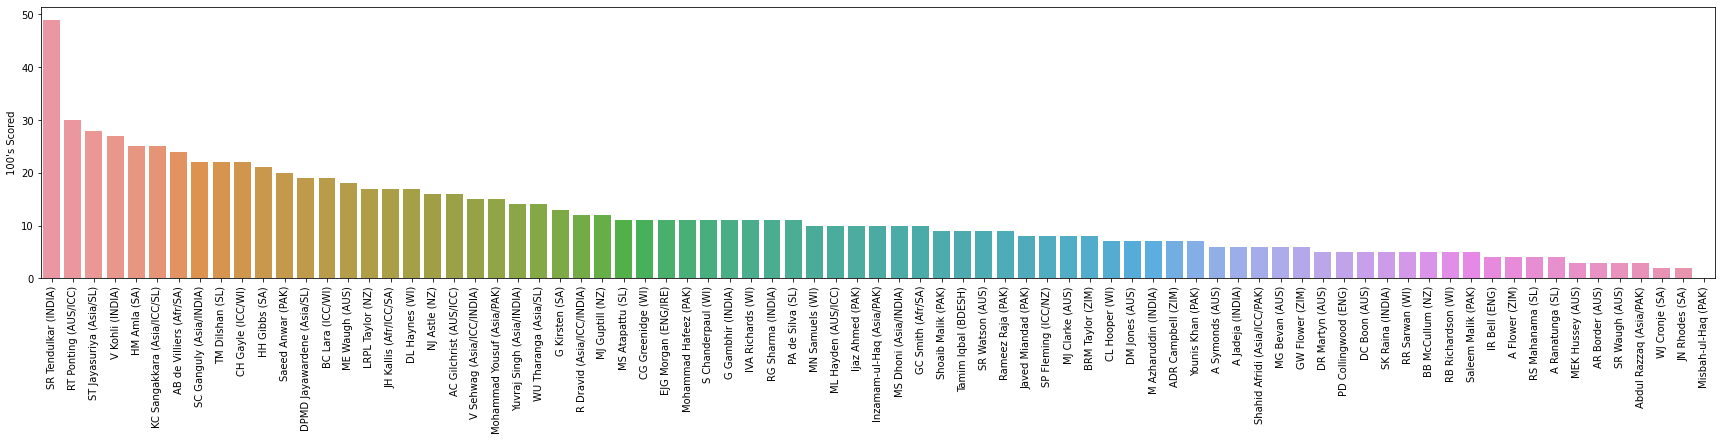

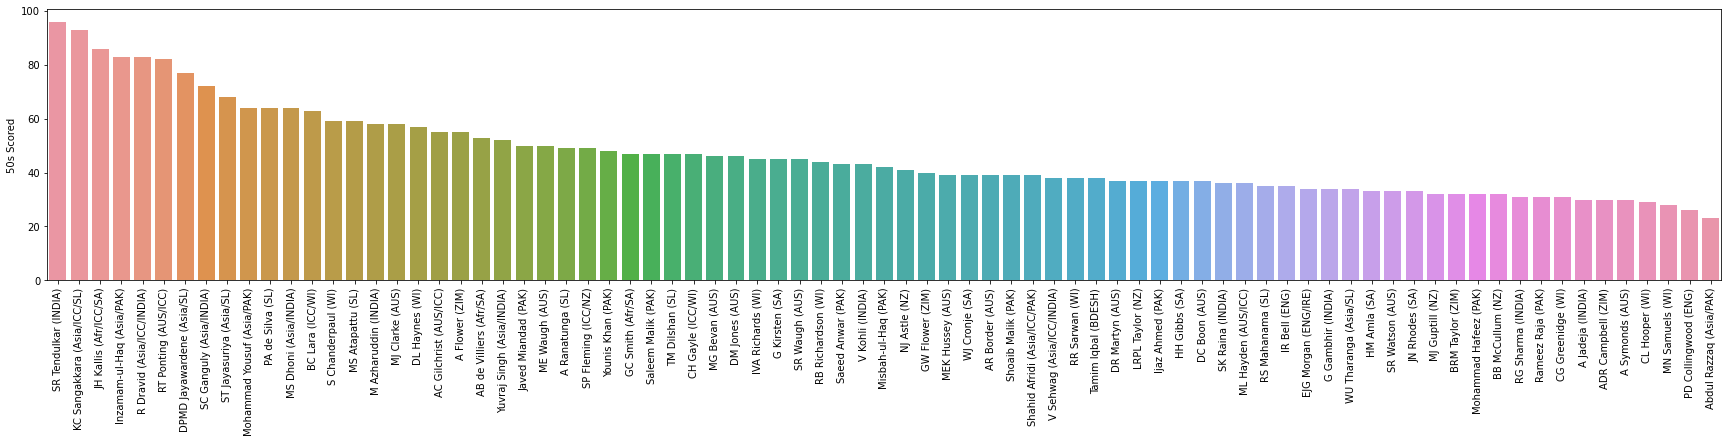

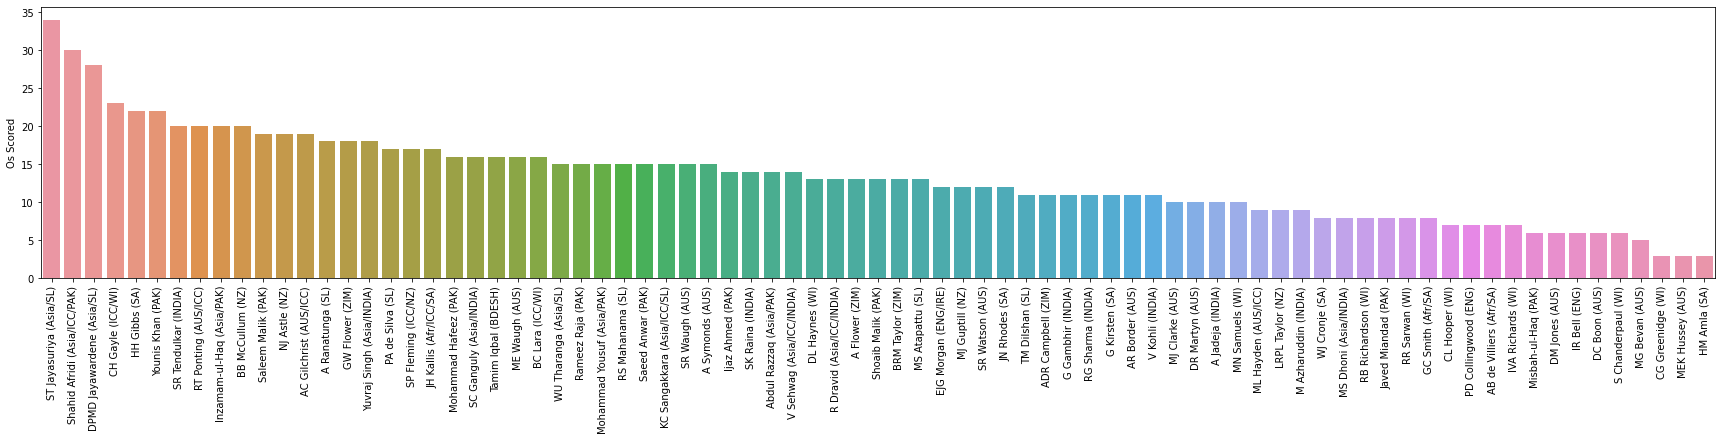

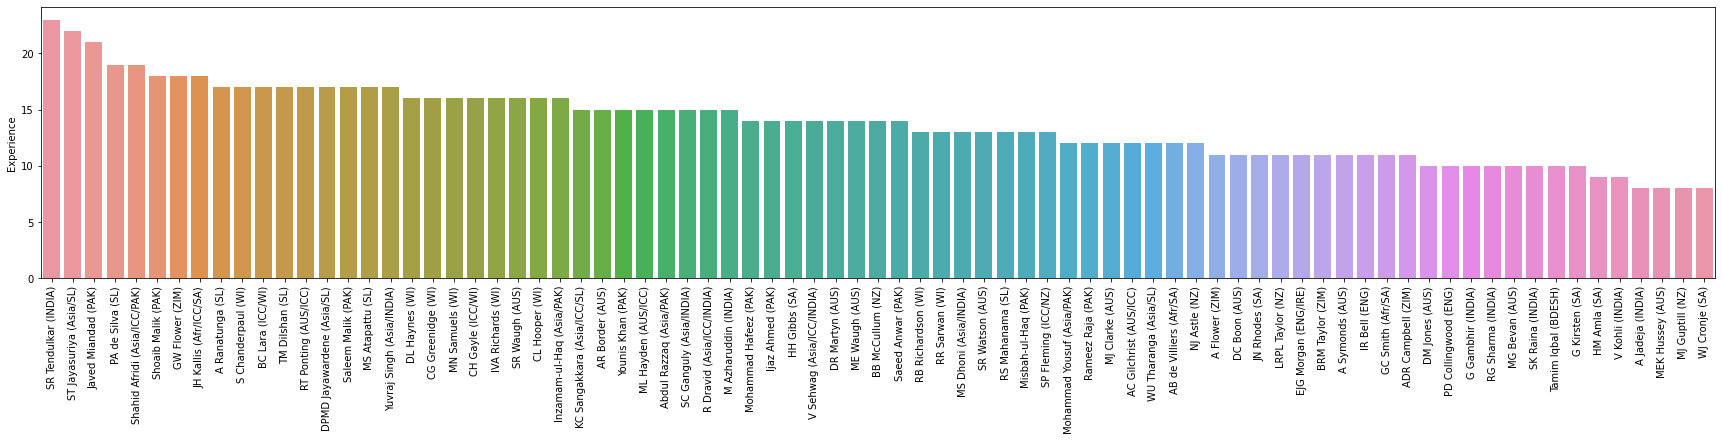

In [11]:
# defining no.of subplots we want
#plt.subplot(1, 1, 1)
#Match Played

 
mat = df[['Player','Mat']].sort_values('Mat', ascending = False)
ax = sns.barplot(x='Player', y='Mat', data= mat)
ax.set(xlabel = '', ylabel= 'Match Played')
plt.xticks(rotation=90)
plt.show()


#Inns
#plt.subplot(1, 2, 2)
plt.figure(figsize = (30,5))
inns = df[['Player','Inns']].sort_values('Inns', ascending = False)
ax = sns.barplot(x='Player', y='Inns', data= inns)
ax.set(xlabel = '', ylabel= 'Innings Played')
plt.xticks(rotation=90)
plt.show()

#NO
#plt.subplot(1, 3, 3)
plt.figure(figsize = (30,5))
no = df[['Player','NO']].sort_values('NO', ascending = False)
ax = sns.barplot(x='Player', y='NO', data= no)
ax.set(xlabel = '', ylabel= 'Not Out')
plt.xticks(rotation=90)
plt.show()

#Runs
#plt.subplot(2, 1, 1)
plt.figure(figsize = (30,5))
run = df[['Player','Runs']].sort_values('Runs', ascending = False)
ax = sns.barplot(x='Player', y='Runs', data= run)
ax.set(xlabel = '', ylabel= 'Runs Scored')
plt.xticks(rotation=90)
plt.show()

#HS
#plt.subplot(2, 2, 2)
df.HS=df.HS.str.extract('(\d+)')
df.HS=df.HS.astype(int)
plt.figure(figsize = (30,5))
hs = df[['Player','HS']].sort_values('HS', ascending = False)
ax = sns.barplot(x='Player', y='HS', data= hs)
ax.set(xlabel = '', ylabel= 'Highest Score')
plt.xticks(rotation=90)
plt.show()

#Ave
#plt.subplot(2, 3, 3)
plt.figure(figsize = (30,5))
ave = df[['Player','Ave']].sort_values('Ave', ascending = False)
ax = sns.barplot(x='Player', y='Ave', data= ave)
ax.set(xlabel = '', ylabel= 'Averages')
plt.xticks(rotation=90)
plt.show()

#BF
#plt.subplot(3, 1, 1)
plt.figure(figsize = (30,5))
bf = df[['Player','BF']].sort_values('BF', ascending = False)
ax = sns.barplot(x='Player', y='BF', data= bf)
ax.set(xlabel = '', ylabel= 'Best Form')
plt.xticks(rotation=90)
plt.show()

#SR 
#plt.subplot(3, 2, 2)
plt.figure(figsize = (30,5))
sr = df[['Player','SR']].sort_values('SR', ascending = False)
ax = sns.barplot(x='Player', y='SR', data= sr)
ax.set(xlabel = '', ylabel= 'SR')
plt.xticks(rotation=90)
plt.show()

#100
#plt.subplot(3, 3, 3)
plt.figure(figsize = (30,5))
r100 = df[['Player','100']].sort_values('100', ascending = False)
ax = sns.barplot(x='Player', y='100', data= r100)
ax.set(xlabel = '', ylabel= "100's Scored" )
plt.xticks(rotation=90)
plt.show()

#50
#plt.subplot(4, 1, 1)
plt.figure(figsize = (30,5))
r50 = df[['Player','50']].sort_values('50', ascending = False)
ax = sns.barplot(x='Player', y='50', data= r50)
ax.set(xlabel = '', ylabel= "50s Scored")
plt.xticks(rotation=90)
plt.show()

#0
#plt.subplot(4, 2, 2)
plt.figure(figsize = (30,5))
r0 = df[['Player','0']].sort_values('0', ascending = False)
ax = sns.barplot(x='Player', y='0', data= r0)
ax.set(xlabel = '', ylabel= "Os Scored")
plt.xticks(rotation=90)
plt.show()

#Exp
#plt.subplot(4, 3, 3)
plt.figure(figsize = (30,5))
exp = df[['Player','Exp']].sort_values('Exp', ascending = False)
ax = sns.barplot(x='Player', y='Exp', data= exp)
ax.set(xlabel = '', ylabel= 'Experience')
plt.xticks(rotation=90)
plt.show()



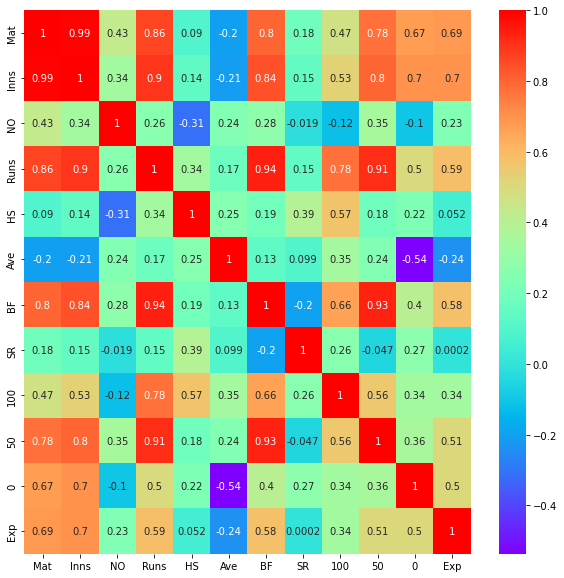

In [12]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (10, 10))
sns.heatmap(df.corr(), annot = True, cmap="rainbow")
plt.savefig('Correlation')
plt.show()

In [27]:
# removing outliers

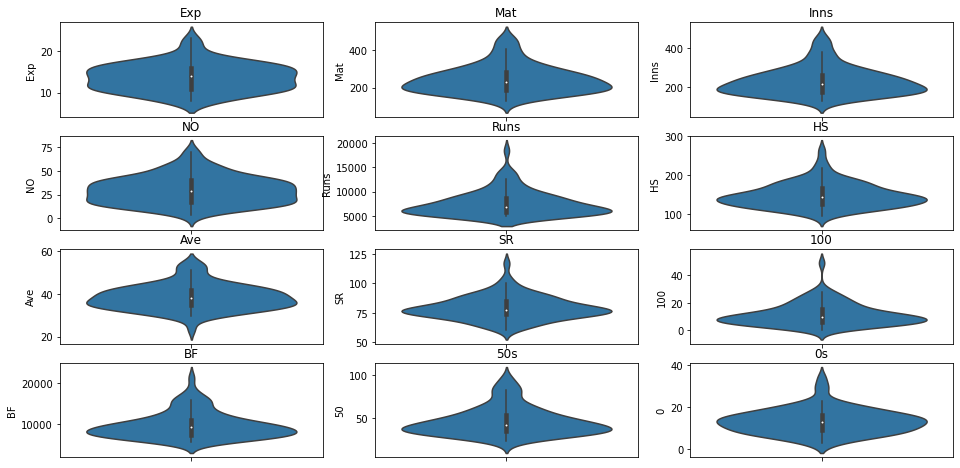

In [13]:
f, axes = plt.subplots(4,3, figsize=(16, 8))
s=sns.violinplot(y=df.Exp,ax=axes[0, 0])
axes[0, 0].set_title('Exp')
s=sns.violinplot(y=df.Mat,ax=axes[0, 1])
axes[0, 1].set_title('Mat')
s=sns.violinplot(y=df.Inns,ax=axes[0, 2])
axes[0, 2].set_title('Inns')

s=sns.violinplot(y=df.NO,ax=axes[1, 0])
axes[1, 0].set_title('NO')
s=sns.violinplot(y=df.Runs,ax=axes[1, 1])
axes[1, 1].set_title('Runs')
s=sns.violinplot(y=df.HS,ax=axes[1, 2])
axes[1, 2].set_title('HS')

s=sns.violinplot(y=df.Ave,ax=axes[2, 0])
axes[2, 0].set_title('Ave')
s=sns.violinplot(y=df.SR,ax=axes[2, 1])
axes[2, 1].set_title('SR')
s=sns.violinplot(y=df['100'],ax=axes[2, 2])
axes[2, 2].set_title('100')
s=sns.violinplot(y=df.BF,ax=axes[3, 0])
axes[3, 0].set_title('BF')
s=sns.violinplot(y=df['50'],ax=axes[3, 1])
axes[3, 1].set_title('50s')
s=sns.violinplot(y=df['0'],ax=axes[3, 2])
axes[3, 2].set_title('0s')
plt.show()

In [14]:
Q3 = df.Mat.quantile(0.99)
Q1 = df.Mat.quantile(0.01)
df['Mat'][df['Mat']<=Q1]=Q1
df['Mat'][df['Mat']>=Q3]=Q3

Q3 = df.Inns.quantile(0.99)
Q1 = df.Inns.quantile(0.01)
df['Inns'][df['Inns']<=Q1]=Q1
df['Inns'][df['Inns']>=Q3]=Q3

Q3 = df.NO.quantile(0.99)
Q1 = df.NO.quantile(0.01)
df['NO'][df['NO']<=Q1]=Q1
df['NO'][df['NO']>=Q3]=Q3

Q3 = df.Runs.quantile(0.99)
Q1 = df.Runs.quantile(0.01)
df['Runs'][df['Runs']<=Q1]=Q1
df['Runs'][df['Runs']>=Q3]=Q3

Q3 = df.HS.quantile(0.99)
Q1 = df.HS.quantile(0.01)
df['HS'][df['HS']<=Q1]=Q1
df['HS'][df['HS']>=Q3]=Q3

Q3 = df.Ave.quantile(0.99)
Q1 = df.Ave.quantile(0.01)
df['Ave'][df['Ave']<=Q1]=Q1
df['Ave'][df['Ave']>=Q3]=Q3

Q3 = df.BF.quantile(0.99)
Q1 = df.BF.quantile(0.01)
df['BF'][df['BF']<=Q1]=Q1
df['BF'][df['BF']>=Q3]=Q3

Q3 = df.SR.quantile(0.99)
Q1 = df.SR.quantile(0.01)
df['SR'][df['SR']<=Q1]=Q1
df['SR'][df['SR']>=Q3]=Q3

Q3 = df.Exp.quantile(0.99)
Q1 = df.Exp.quantile(0.01)
df['Exp'][df['Exp']<=Q1]=Q1
df['Exp'][df['Exp']>=Q3]=Q3

Q3 = df['100'].quantile(0.99)
Q1 = df['100'].quantile(0.01)
df['100'][df['100']<=Q1]=Q1
df['100'][df['100']>=Q3]=Q3

Q3 = df['50'].quantile(0.99)
Q1 = df['50'].quantile(0.01)
df['50'][df['50']<=Q1]=Q1
df['50'][df['50']>=Q3]=Q3

Q3 = df['0'].quantile(0.99)
Q1 = df['0'].quantile(0.01)
df['0'][df['0']<=Q1]=Q1
df['0'][df['0']>=Q3]=Q3



C:\Users\HP\AppData\Local\Temp\ipykernel_1232\2562143085.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Mat'][df['Mat']<=Q1]=Q1
C:\Users\HP\AppData\Local\Temp\ipykernel_1232\2562143085.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Inns'][df['Inns']<=Q1]=Q1
C:\Users\HP\AppData\Local\Temp\ipykernel_1232\2562143085.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NO'][df['NO']<=Q1]=Q1
C:\Users\HP\AppData\Local\T

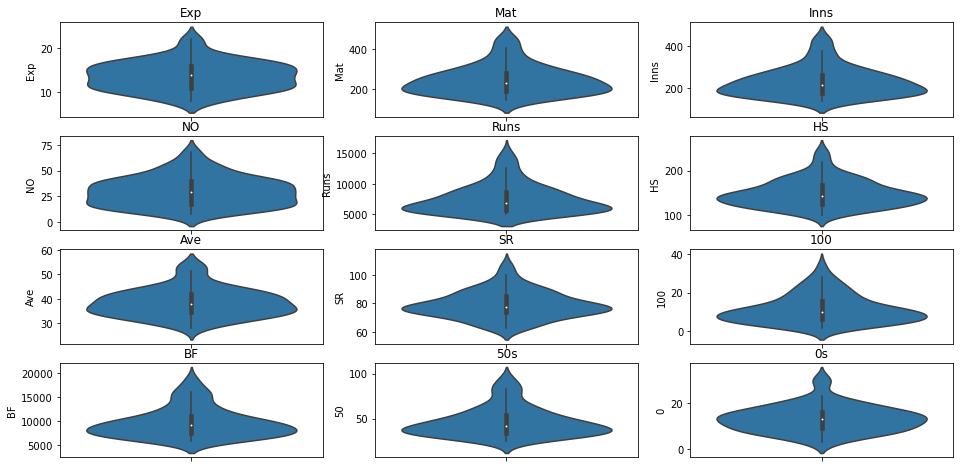

In [15]:
f, axes = plt.subplots(4,3, figsize=(16, 8))
s=sns.violinplot(y=df.Exp,ax=axes[0, 0])
axes[0, 0].set_title('Exp')
s=sns.violinplot(y=df.Mat,ax=axes[0, 1])
axes[0, 1].set_title('Mat')
s=sns.violinplot(y=df.Inns,ax=axes[0, 2])
axes[0, 2].set_title('Inns')

s=sns.violinplot(y=df.NO,ax=axes[1, 0])
axes[1, 0].set_title('NO')
s=sns.violinplot(y=df.Runs,ax=axes[1, 1])
axes[1, 1].set_title('Runs')
s=sns.violinplot(y=df.HS,ax=axes[1, 2])
axes[1, 2].set_title('HS')

s=sns.violinplot(y=df.Ave,ax=axes[2, 0])
axes[2, 0].set_title('Ave')
s=sns.violinplot(y=df.SR,ax=axes[2, 1])
axes[2, 1].set_title('SR')
s=sns.violinplot(y=df['100'],ax=axes[2, 2])
axes[2, 2].set_title('100')
s=sns.violinplot(y=df.BF,ax=axes[3, 0])
axes[3, 0].set_title('BF')
s=sns.violinplot(y=df['50'],ax=axes[3, 1])
axes[3, 1].set_title('50s')
s=sns.violinplot(y=df['0'],ax=axes[3, 2])
axes[3, 2].set_title('0s')
plt.show()

In [16]:
# Dropping Player field as final dataframe will only contain data columns

df_drop = df.copy()
player = df_drop.pop('Player')

In [17]:
df_drop.head()

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,451.3,437.18,41.0,15156.24,200.0,44.83,18778.18,86.23,34.18,93.66,20.00,22.22
1,404.0,380.00,41.0,14234.00,169.0,41.98,18048.00,78.86,25.00,93.00,15.00,15.00
2,375.0,365.00,39.0,13704.00,164.0,42.03,17046.00,80.39,30.00,82.00,20.00,17.00
3,445.0,433.00,18.0,13430.00,189.0,32.36,14725.00,91.20,28.00,68.00,30.88,22.00
4,448.0,418.00,39.0,12650.00,144.0,33.37,16020.00,78.96,19.00,77.00,28.00,17.00


In [18]:
# Rescaling the Features

In [19]:
import sklearn
from sklearn.preprocessing import StandardScaler

In [20]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_drop)
df_scaled 

array([[ 2.82279967e+00,  2.99188395e+00,  7.72431175e-01,
         3.18356123e+00,  1.69403032e+00,  1.08826122e+00,
         2.98241352e+00,  7.49179671e-01,  3.13264038e+00,
         2.92935542e+00,  1.17861903e+00,  2.59980337e+00],
       [ 2.17526315e+00,  2.16409181e+00,  7.72431175e-01,
         2.79619505e+00,  6.63399607e-01,  5.92157985e-01,
         2.74368859e+00, -3.56865202e-02,  1.87083605e+00,
         2.88840881e+00,  3.10241582e-01,  3.87084249e-01],
       [ 1.77825344e+00,  1.94693753e+00,  6.31248299e-01,
         2.57358047e+00,  4.97168847e-01,  6.00861551e-01,
         2.41609488e+00,  1.27250423e-01,  2.55809331e+00,
         2.20596529e+00,  1.17861903e+00,  1.00002583e+00],
       [ 2.73655274e+00,  2.93137029e+00, -8.51171904e-01,
         2.45849293e+00,  1.32832265e+00, -1.08240802e+00,
         1.65726753e+00,  1.27845850e+00,  2.28319041e+00,
         1.33740082e+00,  3.06820835e+00,  2.53237980e+00],
       [ 2.77762271e+00,  2.71421601e+00,  6.3124829

In [21]:
df_df1 = pd.DataFrame(df_scaled, columns = [ 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR', '100',
                                            '50', '0', 'Exp'])
df_df1.head()

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,2.822800,2.991884,0.772431,3.183561,1.694030,1.088261,2.982414,0.749180,3.132640,2.929355,1.178619,2.599803
1,2.175263,2.164092,0.772431,2.796195,0.663400,0.592158,2.743689,-0.035687,1.870836,2.888409,0.310242,0.387084
2,1.778253,1.946938,0.631248,2.573580,0.497169,0.600862,2.416095,0.127250,2.558093,2.205965,1.178619,1.000026
3,2.736553,2.931370,-0.851172,2.458493,1.328323,-1.082408,1.657268,1.278458,2.283190,1.337401,3.068208,2.532380
4,2.777623,2.714216,0.631248,2.130871,-0.167754,-0.906596,2.080655,-0.025037,1.046127,1.895764,2.568023,1.000026


In [22]:
# Model Building

In [23]:
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

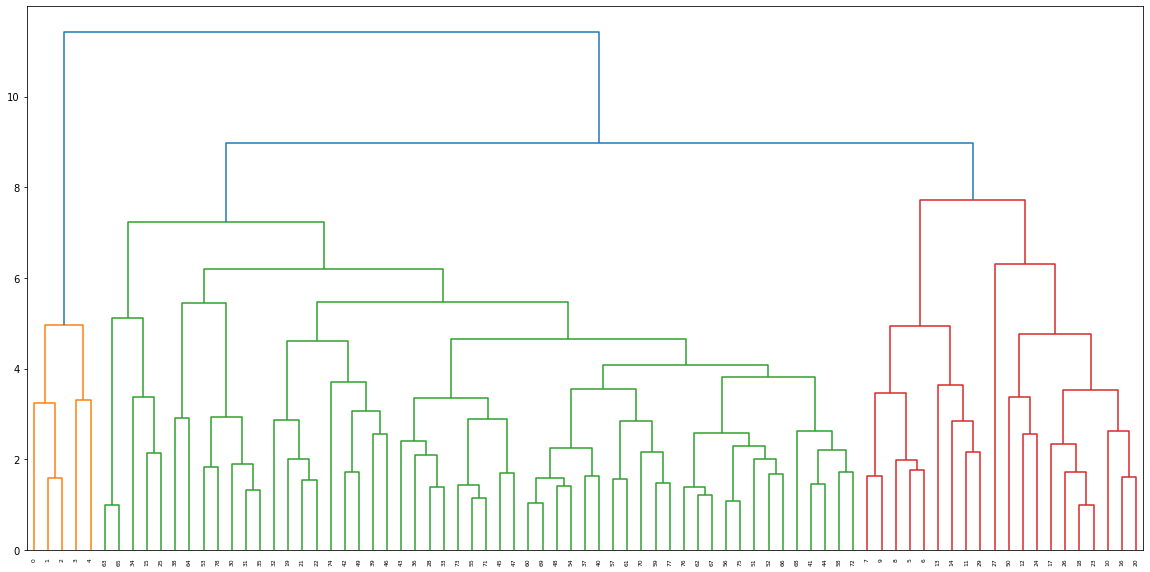

In [25]:
# Complete Linkage
plt.figure(figsize = (20,10))
mergings = linkage(df_df1, method='complete',metric='euclidean')
dendrogram(mergings)
plt.show()

In [26]:
from scipy.cluster.hierarchy import cut_tree

In [27]:
# 4 clusters
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 3, 2, 2, 2, 3, 2, 3,
       3, 2, 2, 3, 2, 2, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [28]:
# assign cluster labels
df_hc = df.copy()
df_hc.head()
df_hc['Cluster_labels'] = cluster_labels
df_hc.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,Cluster_labels
0,SR Tendulkar (INDIA),451.3,437.18,41.0,15156.24,200.0,44.83,18778.18,86.23,34.18,93.66,20.00,22.22,0
1,KC Sangakkara (Asia/ICC/SL),404.0,380.00,41.0,14234.00,169.0,41.98,18048.00,78.86,25.00,93.00,15.00,15.00,0
2,RT Ponting (AUS/ICC),375.0,365.00,39.0,13704.00,164.0,42.03,17046.00,80.39,30.00,82.00,20.00,17.00,0
3,ST Jayasuriya (Asia/SL),445.0,433.00,18.0,13430.00,189.0,32.36,14725.00,91.20,28.00,68.00,30.88,22.00,0
4,DPMD Jayawardene (Asia/SL),448.0,418.00,39.0,12650.00,144.0,33.37,16020.00,78.96,19.00,77.00,28.00,17.00,0


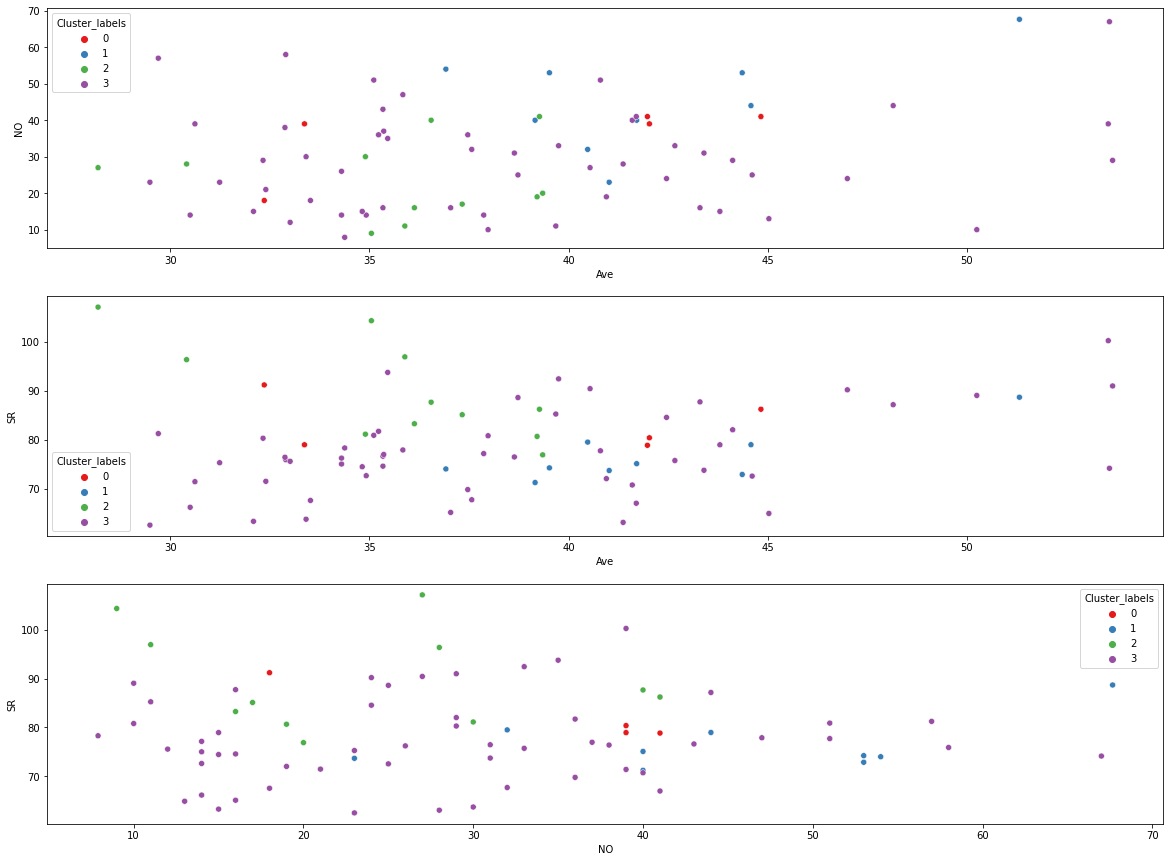

In [29]:
# Scatter plot on Original attributes to visualize the spread of the data

plt.figure(figsize = (20,15))
plt.subplot(3,1,1)
sns.scatterplot(x = 'Ave', y = 'NO',hue='Cluster_labels',data = df_hc,legend='full',palette="Set1")
plt.subplot(3,1,2)
sns.scatterplot(x = 'Ave', y = 'SR',hue='Cluster_labels', data = df_hc,legend='full',palette="Set1")
plt.subplot(3,1,3)
sns.scatterplot(x = 'NO', y = 'SR',hue='Cluster_labels', data=df_hc,legend='full',palette="Set1")
plt.show()

In [30]:
df_hc[df_hc['Cluster_labels']==0].sort_values(by = ['NO','Ave','SR'], ascending = [True,False,False]).head()
#Can be Batsman Coach

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,Cluster_labels
3,ST Jayasuriya (Asia/SL),445.0,433.00,18.0,13430.00,189.0,32.36,14725.00,91.20,28.00,68.00,30.88,22.00,0
2,RT Ponting (AUS/ICC),375.0,365.00,39.0,13704.00,164.0,42.03,17046.00,80.39,30.00,82.00,20.00,17.00,0
4,DPMD Jayawardene (Asia/SL),448.0,418.00,39.0,12650.00,144.0,33.37,16020.00,78.96,19.00,77.00,28.00,17.00,0
0,SR Tendulkar (INDIA),451.3,437.18,41.0,15156.24,200.0,44.83,18778.18,86.23,34.18,93.66,20.00,22.22,0
1,KC Sangakkara (Asia/ICC/SL),404.0,380.00,41.0,14234.00,169.0,41.98,18048.00,78.86,25.00,93.00,15.00,15.00,0


In [31]:
df_hc[df_hc['Cluster_labels']==1].sort_values(by = ['NO','Ave','SR'], ascending = [True,False,False]).head()
#MiddleOrders 

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,Cluster_labels
7,SC Ganguly (Asia/INDIA),311.0,300.0,23.0,11363.0,183.0,41.02,15416.0,73.70,22.0,72.0,16.0,15.0,1
9,BC Lara (ICC/WI),299.0,289.0,32.0,10405.0,169.0,40.48,13086.0,79.51,19.0,63.0,16.0,17.0,1
11,Mohammad Yousuf (Asia/PAK),288.0,273.0,40.0,9720.0,141.0,41.71,12942.0,75.10,15.0,64.0,15.0,12.0,1
8,R Dravid (Asia/ICC/INDIA),344.0,318.0,40.0,10889.0,153.0,39.16,15284.0,71.24,12.0,83.0,13.0,15.0,1
29,MJ Clarke (AUS),245.0,223.0,44.0,7981.0,130.0,44.58,10104.0,78.98,8.0,58.0,10.0,12.0,1


In [32]:
df_hc[df_hc['Cluster_labels']==2].sort_values(by = ['NO','Ave','SR'], ascending = [True,False,False]).head()
#Hitters

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,Cluster_labels
24,V Sehwag (Asia/ICC/INDIA),251.0,245.0,9.0,8273.0,219.0,35.05,7929.0,104.33,15.0,38.0,14.0,14.0,2
12,AC Gilchrist (AUS/ICC),287.0,279.0,11.0,9619.0,172.0,35.89,9922.0,96.94,16.0,55.0,19.0,12.0,2
26,HH Gibbs (SA),248.0,240.0,16.0,8094.0,175.0,36.13,9721.0,83.26,21.0,37.0,22.0,14.0,2
17,CH Gayle (ICC/WI),269.0,264.0,17.0,9221.0,215.0,37.33,10834.0,85.11,22.0,47.0,23.0,16.0,2
18,Saeed Anwar (PAK),247.0,244.0,19.0,8824.0,194.0,39.21,10938.0,80.67,20.0,43.0,15.0,14.0,2


In [33]:
df_hc[df_hc['Cluster_labels']==3].sort_values(by = ['NO','Ave','SR'], ascending = [True,False,False]).head()
#Hitters 2 

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,Cluster_labels
60,Tamim Iqbal (BDESH),173.0,171.0,7.9,5743.0,154.0,34.38,7333.0,78.31,9.0,38.0,16.0,10.0,3
34,HM Amla (SA),156.0,153.0,10.0,7186.0,159.0,50.25,8069.0,89.05,25.0,33.0,3.0,9.0,3
37,GC Smith (Afr/SA),197.0,194.0,10.0,6989.0,141.0,37.98,8648.0,80.81,10.0,47.0,8.0,11.0,3
70,G Gambhir (INDIA),147.0,143.0,11.0,5238.0,150.0,39.68,6144.0,85.25,11.0,34.0,11.0,10.0,3
54,Mohammad Hafeez (PAK),190.0,190.0,12.0,5876.0,140.0,33.01,7774.0,75.58,11.0,32.0,16.0,14.0,3


In [34]:
# Final List of Players who can appointed in a new team for Batsman role

In [35]:
FinalListbyHC=df_hc[df_hc['Cluster_labels']==2].sort_values(by = ['NO','Ave','SR'], ascending = [True,False,False])
FinalListbyHC['Player']
FinalListbyHC.reset_index(drop=True).Player[:]

0        V Sehwag (Asia/ICC/INDIA)
1           AC Gilchrist (AUS/ICC)
2                    HH Gibbs (SA)
3                CH Gayle (ICC/WI)
4                Saeed Anwar (PAK)
5                   ME Waugh (AUS)
6     Shahid Afridi (Asia/ICC/PAK)
7                 BB McCullum (NZ)
8                 PA de Silva (SL)
9        Yuvraj Singh (Asia/INDIA)
10                 TM Dilshan (SL)
Name: Player, dtype: object